In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
full = pd.read_csv("users_zip.csv")

full.head(5)

,userID,gender,age,occupation,city,state,lat,long,country
0,1,F,12.0,K-12 student,ROYAL OAK,MI,42.50,-83.15,US
1,2,M,68.0,self-employed,MARRERO,LA,29.88,-90.11,US
2,3,M,29.5,scientist,SAINT PAUL,MN,44.94,-93.10,US
3,4,M,47.0,executive/managerial,NEWTONVILLE,MA,42.35,-71.20,US
4,5,M,29.5,writer,MINNEAPOLIS,MN,44.96,-93.26,US


US    5967
DE       3
TR       1
MH       1
Name: country, dtype: int64

CA    1100
NY     464
MN     432
TX     311
MA     298
IL     287
Name: state, dtype: int64


M    4278
F    1694
Name: gender, dtype: int64


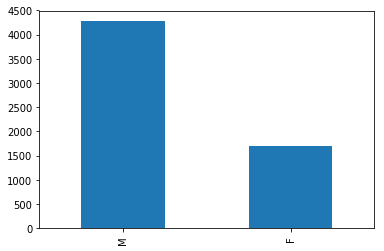

In [17]:
print(full["gender"].value_counts(dropna=False))

full["gender"].value_counts().plot(kind='bar')

In [18]:
print(full["age"].value_counts(dropna=False))
# full["age"] = full["age"].astype(object)

29.5    2074
39.5    1183
21.0    1085
47.0     545
52.5     494
68.0     376
12.0     215
Name: age, dtype: int64


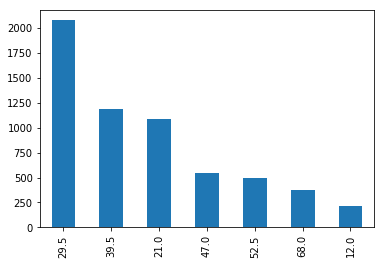

In [19]:
full["age"].value_counts().plot(kind='bar')

In [26]:
table = pd.pivot_table(full, index='occupation', columns='gender', aggfunc='count', values='age')
flattened = pd.DataFrame(table.to_records())
flattened.set_index('occupation', inplace=True)
print(flattened)

                        F    M
occupation                    
K-12 student           63  127
academic/educator     207  312
artist                 90  174
clerical/admin        100   72
college/grad student  232  517
customer service       31   79
doctor/health care    101  132
executive/managerial  139  534
farmer                  3   12
homemaker              89    3
lawyer                 22  107
other                 230  475
programmer             49  333
retired                33  108
sales/marketing        79  220
scientist              28  116
self-employed          51  187
technician/engineer    52  447
tradesman/craftsman     4   66
unemployed             15   56
writer                 76  201


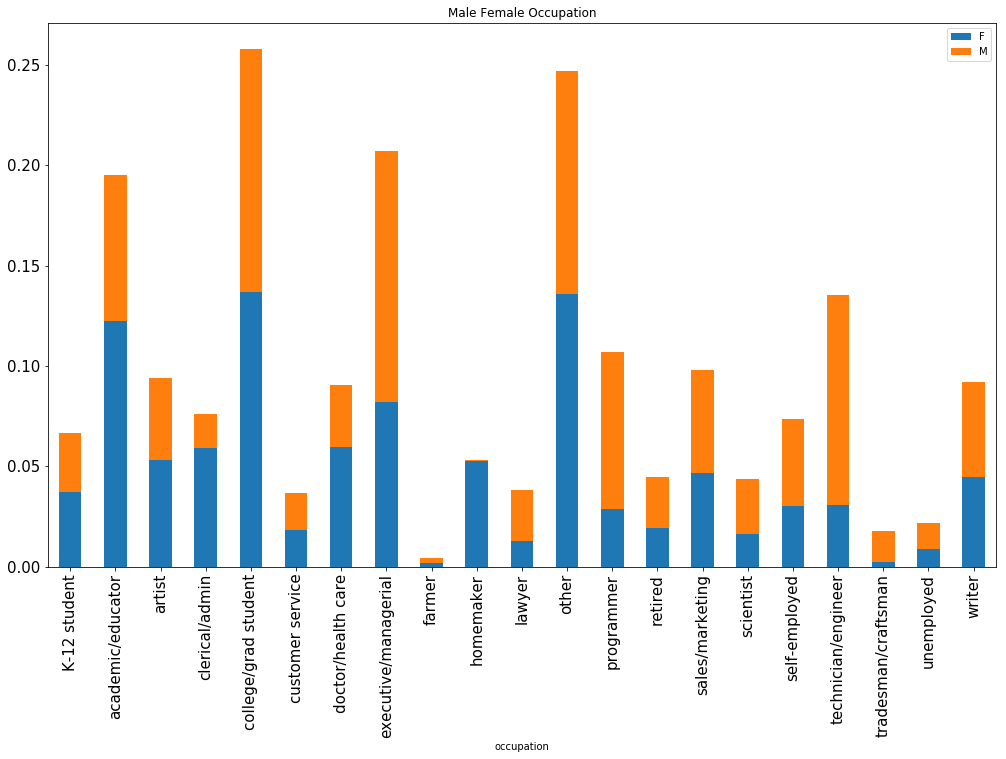

In [37]:
# plt.title("Male Female Occupation")
flattened.plot.bar(stacked=True, figsize=(17,10), title="Male Female Occupation", fontsize=15)

# plt.savefig("occup_hist_mf")

In [32]:
s = flattened.sum(axis=0).values
print(s)

flattened = flattened.apply(lambda x: x / s, axis=1)
print(flattened)
print(flattened.sum(axis=0))
# plt.title("Male Female occupation")
#flattened.plot.bar(figsize=(17,17), title="Male Female Occupation Proportion")

[1. 1.]
                             F         M
occupation                              
K-12 student          0.037190  0.029687
academic/educator     0.122196  0.072931
artist                0.053129  0.040673
clerical/admin        0.059032  0.016830
college/grad student  0.136954  0.120851
customer service      0.018300  0.018467
doctor/health care    0.059622  0.030856
executive/managerial  0.082054  0.124825
farmer                0.001771  0.002805
homemaker             0.052538  0.000701
lawyer                0.012987  0.025012
other                 0.135773  0.111033
programmer            0.028926  0.077840
retired               0.019481  0.025245
sales/marketing       0.046635  0.051426
scientist             0.016529  0.027115
self-employed         0.030106  0.043712
technician/engineer   0.030697  0.104488
tradesman/craftsman   0.002361  0.015428
unemployed            0.008855  0.013090
writer                0.044864  0.046985
F    1.0
M    1.0
dtype: float64


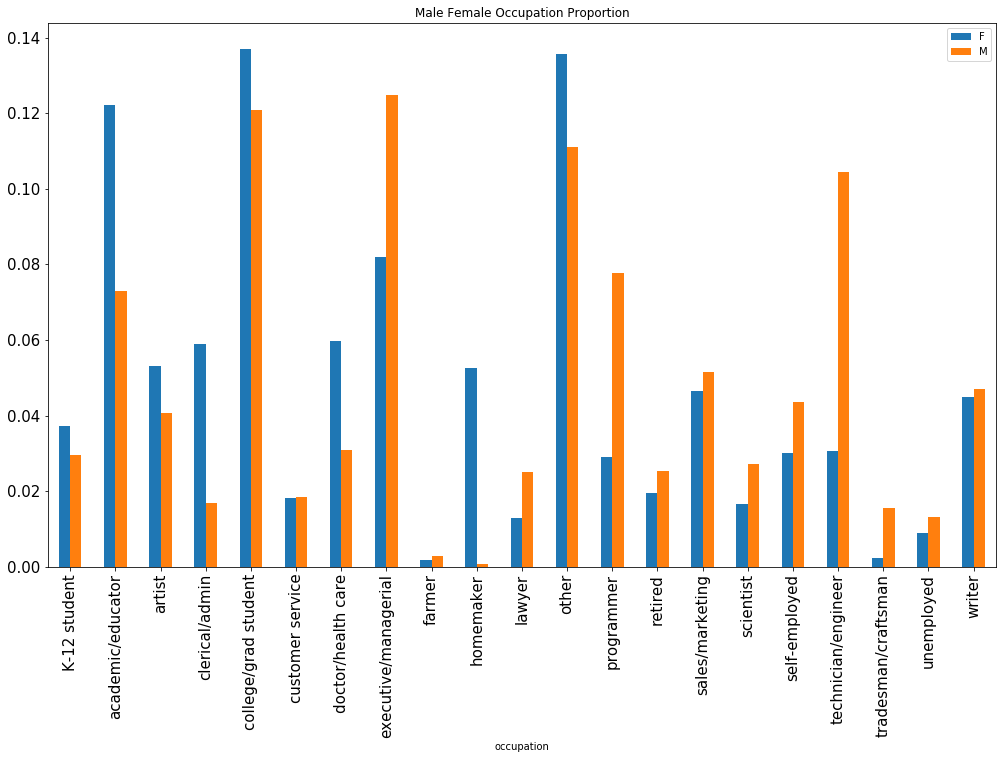

In [39]:
flattened.plot.bar(figsize=(17,10), title="Male Female Occupation Proportion", fontsize=15)

Almost all users are from US, except 3 from 3ermany, 1 from Turkey and 1 from Marshall Islands

In [42]:
print(full["country"].value_counts(dropna=False))
print()
print(full["state"].value_counts().sort_values(ascending=False).head(4))

mask = (full["country"].astype("str") == 'DE') | (full["country"].astype("str") == 'TR')\
        | (full["country"].astype("str") == 'MH')
    
print(full[mask])

US    5967
DE       3
TR       1
MH       1
Name: country, dtype: int64

CA    1100
NY     464
MN     432
TX     311
Name: state, dtype: int64
      userID gender   age            occupation city state  lat  long country
3294    3334      M  39.5                 other  APO    AE  NaN   NaN      DE
4228    4278      F  47.0  executive/managerial  APO    AE  NaN   NaN      DE
5129    5186      M  39.5            programmer  APO    AP  NaN   NaN      MH
5467    5531      M  52.5   technician/engineer  APO    AE  NaN   NaN      DE
5663    5728      F  39.5                writer  APO    AE  NaN   NaN      TR


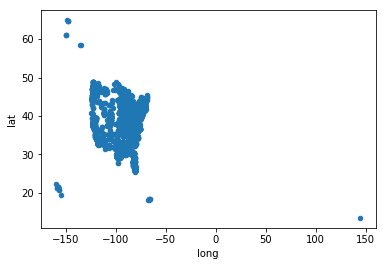

In [44]:
full.plot(kind='scatter', x="long", y="lat")

In [53]:
strange_u = (full['long'] > 0) | (full['lat'] < 24) | (full['lat'] > 55)
full[strange_u].head(10)

,userID,gender,age,occupation,city,state,lat,long,country
52,53,M,29.5,other,TAMUNING,GU,13.48,144.77,US
103,104,M,29.5,programmer,SAN JUAN,PR,18.40,-66.06,US
131,132,M,29.5,technician/engineer,FAIRBANKS,AK,64.90,-148.16,US
317,320,M,39.5,doctor/health care,ANCHORAGE,AK,61.08,-149.70,US
543,548,F,39.5,self-employed,J B P H H,HI,21.36,-157.94,US
684,691,M,39.5,lawyer,HONOLULU,HI,21.30,-157.85,US
940,949,M,52.5,technician/engineer,KIHEI,HI,20.76,-156.45,US
986,995,F,21.0,college/grad student,HONOLULU,HI,21.30,-157.85,US
1013,1022,M,29.5,clerical/admin,SAN JUAN,PR,18.40,-66.06,US
1615,1633,F,47.0,executive/managerial,FAIRBANKS,AK,64.81,-147.72,US


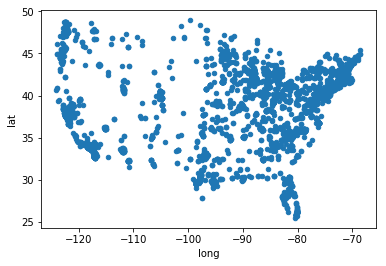

In [51]:
full[ -strange_u ].plot(kind='scatter', x="long", y="lat")

In [62]:
# full["state"].value_counts().plot(kind='bar', figsize=(17,10))

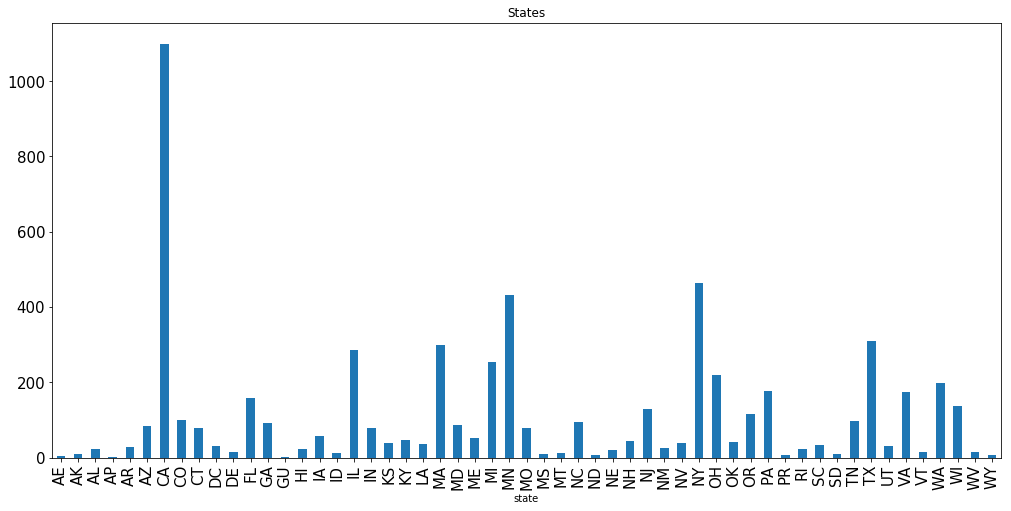

In [72]:
full.groupby("state").size().plot(kind="bar", figsize=(17,8), title="States", fontsize=15,y="Counts")

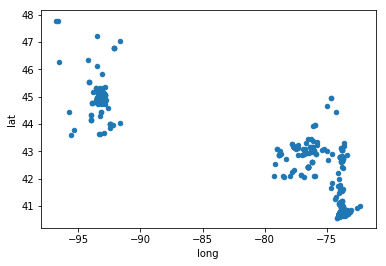

In [63]:
state_mask = (full["state"].astype("str") == "NY") | (full["state"].astype("str") == "MN")
full[ state_mask ].plot(kind='scatter', x="long", y="lat")

In [68]:
table = pd.pivot_table(full[state_mask], index='occupation', columns='state', aggfunc='count', values='age')
print(table)
flattened = pd.DataFrame(table.to_records())
flattened.set_index('occupation', inplace=True)
print(flattened)

state                   MN    NY
occupation                      
K-12 student          17.0  14.0
academic/educator     37.0  39.0
artist                27.0  31.0
clerical/admin        18.0   8.0
college/grad student  46.0  50.0
customer service      11.0   9.0
doctor/health care     9.0  13.0
executive/managerial  42.0  75.0
farmer                 NaN   2.0
homemaker              5.0   6.0
lawyer                 9.0  13.0
other                 44.0  61.0
programmer            47.0  23.0
retired                6.0  10.0
sales/marketing       28.0  20.0
scientist              9.0   7.0
self-employed         16.0  22.0
technician/engineer   34.0  17.0
tradesman/craftsman    8.0   8.0
unemployed             2.0   7.0
writer                17.0  29.0
                        MN    NY
occupation                      
K-12 student          17.0  14.0
academic/educator     37.0  39.0
artist                27.0  31.0
clerical/admin        18.0   8.0
college/grad student  46.0  50.0
customer s

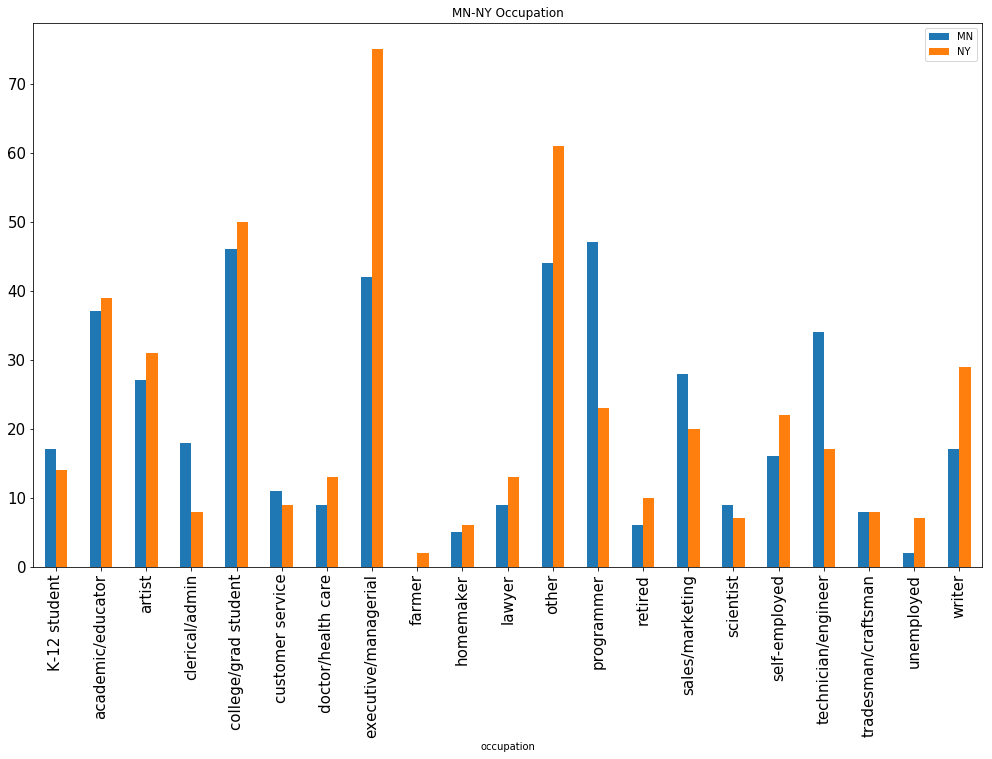

In [69]:
flattened.plot.bar(figsize=(17,10), title="MN-NY Occupation", fontsize=15)